In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS = 3 #number of layers in CNN
EPOCHS = 40

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/tomato_deepLearning/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16021 files belonging to 10 classes.


In [5]:
class_names = dataset.class_names
print(len(class_names))
class_names

10


['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

501

In [7]:
501*32 #16032 not 16021 because last batch is not complete

16032

(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0 8 0 6]
(32, 256, 256, 3)
[9 6 2 0 5 7 9 4 2 1 7 4 7 7 9 8 2 7 2 2 3 2 7 7 7 1 2 2 0

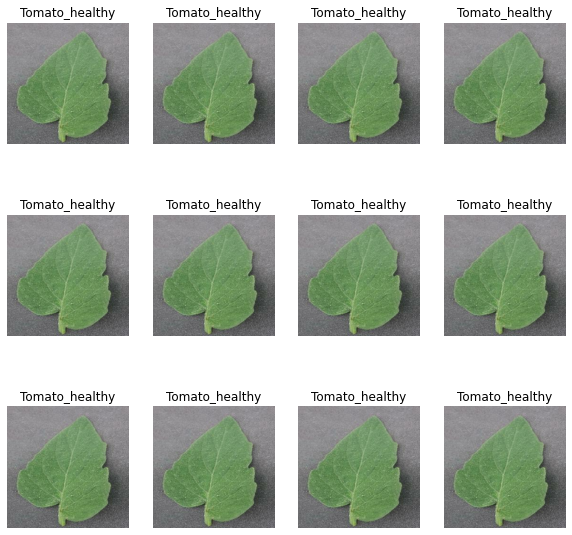

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1): #take is used to take a limited number of samples from dataset
    for i in range(12):
        ax=plt.subplot(3,4,i+1)    
        print(image_batch.shape)
        print(label_batch.numpy())
        plt.imshow(image_batch[0].numpy().astype("uint8")) #numpy data is float, but RGB is int thats why uint8 to convert into int
        plt.axis("off")
        plt.title(class_names[label_batch[0]]) #label_batch[0] gives a number 0,1,2 thatswhy classname to give exact name from list

In [9]:
len(dataset)
#80% ==> training
#20% ==> 10% validation, 10% test

501

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.3, val_split=0.05, test_split=0.05,shuffle=True, shuffle_size=150):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    test_size = int(test_split*ds_size)

    train_ds = dataset.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size).take(test_size)

    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [12]:
len(train_ds)

150

In [13]:
len(val_ds)

25

In [14]:
len(test_ds)

25

In [15]:
train_ds = train_ds.cache().shuffle(150).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(150).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(150).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), #whenever new image is fed to the system, 
    #to compare with the dataset available, it will resize it to the same size as that of our sample images                                        
    layers.experimental.preprocessing.Rescaling(1.0/255) #Noramalization
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

In [18]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), #softmax normalizes the probability of the classes
])

model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/40
150/150 [==============================] - ETA: 0s - loss: 1.9373 - accuracy: 0.2850

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
history.history['accuracy']

In [ ]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])

    batch_prediction = model.predict(images_batch) #predicts for full batch of 32
    print("predicted",class_names[np.argmax(batch_prediction[0])]) # picking first photo prediction, and from probability getting label of prediction

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}")

        plt.axis("off")

In [ ]:
!mkdir -p saved_tomato_model

In [ ]:
print(os.listdir("saved_tomato_model"))

In [ ]:
!ls

In [ ]:
model_version=1
model.save(f"saved_tomato_model/{model_version}")

In [ ]:
import os
model_version =max([int(i) for i in os.listdir("saved_tomato_model")+[0]])+1
model.save(f"saved_tomato_model/{model_version}")

In [ ]:
!ls

In [ ]:
!cp -r "/content/saved_tomato_model" "/content/drive/MyDrive/tomato_deepLearning"